# Diabetic Retinopathy Detection
Predict whether diabetic retinopathy is referenceable (NPDR {Moderate or beyond} or DPR with
NDE) or not. Do not worry if you cannot differentiate the images with your eyes (it requires
trained professional and a well-trained neural network to do it). Note that the class imbalance
has to be accounted for (will be appropriately rewarded). This is a binary classification problem.

## Pre-Processing

In [29]:
# imports
import os
from pathlib import Path
import cv2 #opencv-python
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

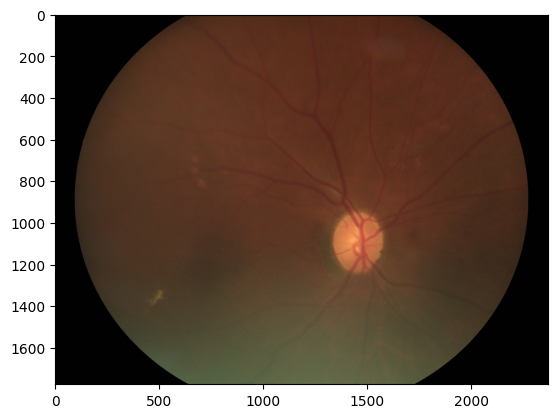

In [37]:
# display sample image
data_dir = os.path.join(os.getcwd(), "../data/SAUNAR/")
img_dirs = [data_dir + name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
sample_img = os.path.join(img_dirs[0],os.listdir(img_dirs[0])[0])
img = mpimg.imread(sample_img)
imgplot = plt.imshow(img)
plt.show()
# for dir in img_dirs:
#     for img in dir:
        



In [ ]:
# extend to all images